In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Netflix data Set/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [3]:
df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [5]:
# Distribution of different ratings in the datset
rating_count=df.groupby('Rating').agg(['count'])
rating_count

,Cust_Id
,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [6]:
#Total Movie Count
Total_Movie_count=df.isnull().sum()[1]
Total_Movie_count

<ipython-input-6-78f188b92102>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Total_Movie_count=df.isnull().sum()[1]


4499

In [7]:
#Total Customer Count
cust_count=len(df['Cust_Id'].unique())-Total_Movie_count
cust_count

470758

In [8]:
#Total Rating Count
Tot_rating_count=df.shape[0]-Total_Movie_count
Tot_rating_count

24053764

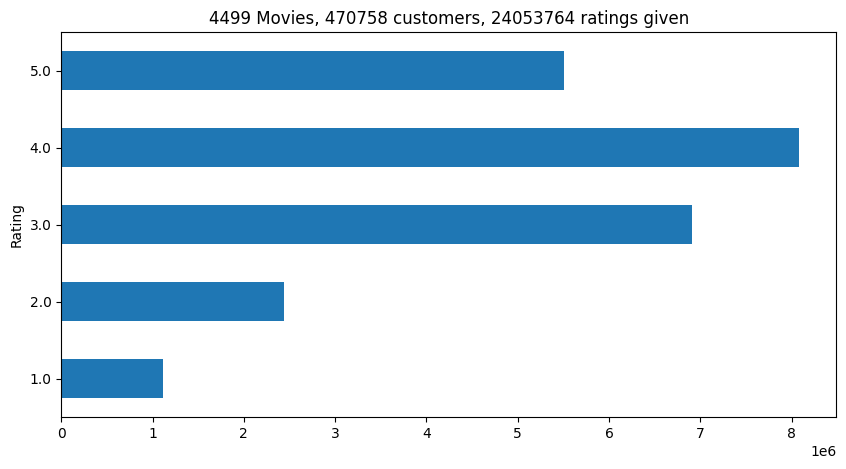

In [9]:
#To plot the distribution of the ratings in as a bar plot
rating_count.plot(kind='barh',legend=False,figsize=(10,5))
plt.title(f'{Total_Movie_count} Movies, {cust_count} customers, {Tot_rating_count} ratings given')
plt.show()

In [10]:
#Movie_id Dataset
df2=df[df['Rating'].isnull()].reset_index()
df2

,index,Cust_Id,Rating
0,0,1:,NaN
1,548,2:,NaN
2,694,3:,NaN
3,2707,4:,NaN
4,2850,5:,NaN
...,...,...,...
4494,24046714,4495:,NaN
4495,24047329,4496:,NaN
4496,24056849,4497:,NaN
4497,24057564,4498:,NaN


In [11]:
#To create a numpy array containing movie ids according the 'ratings' dataset
movie_np=[]
movie_id=1
for i,j in zip(df2['index'][1:],df2['index'][:-1]):
  a=np.full((1,i-j-1),movie_id)
  movie_np=np.append(movie_np,a)
  movie_id +=1
last_record=np.full((1,len(df)-df2.iloc[-1,0]-1),movie_id)
movie_np=np.append(movie_np,last_record)
print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [12]:
#append the above created array to the datset after removing the 'nan' rows
df=df[pd.notnull(df['Rating'])]
df['movie_id']=movie_np.astype(int)
df['Cust_Id']=df['Cust_Id'].astype(int)
df2.head()

,index,Cust_Id,Rating
0,0,1:,NaN
1,548,2:,NaN
2,694,3:,NaN
3,2707,4:,NaN
4,2850,5:,NaN


In [13]:
df.shape

(24053764, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   movie_id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [16]:
#Total Ratings received for Movie Id
movie_ratings_count=df.groupby('movie_id')['Rating'].agg('count')
movie_ratings_count

,Rating
movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [17]:
#Movie minimum times of review Bench Mark with IQR range of 70%
movie_bm=round(movie_ratings_count.quantile(0.7),0)
movie_bm

1799.0

In [18]:
#Movie List Index Numbers equal and above Bench Mark
movie_list=movie_ratings_count[movie_ratings_count>=movie_bm].index.map(int)
movie_list

Index([   3,    8,   16,   17,   18,   26,   28,   30,   32,   33,
       ...
       4472, 4474, 4478, 4479, 4485, 4488, 4490, 4492, 4493, 4496],
      dtype='int64', name='movie_id', length=1350)

In [19]:
#Total Ratings Given By The Customer
cust_review_count=df.groupby('Cust_Id')['Rating'].agg('count')
cust_review_count

,Rating
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [20]:
#Customer minimum times of review with 70% IQR Range
cust_bm=round(cust_review_count.quantile(0.7),0)
cust_bm

52.0

In [21]:
#Customer Id index number with equal and above Benchmark
cust_list=cust_review_count[cust_review_count>=cust_bm].index.map(int)
cust_list

Index([      6,       7,      79,      97,     134,     169,     183,     188,
           195,     199,
       ...
       2649308, 2649328, 2649331, 2649335, 2649336, 2649370, 2649378, 2649388,
       2649426, 2649429],
      dtype='int64', name='Cust_Id', length=143458)

In [22]:
orginal_df_shape=df.shape
orginal_df_shape

(24053764, 3)

In [23]:
#Filtering Orginal Data Set With Movie lsit Bench Mark and User_id Benchmark
df=df[df['movie_id'].isin(movie_list)]
df=df[df['Cust_Id'].isin(cust_list)]
df

,Cust_Id,Rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496


In [24]:
df_title = pd.read_csv('/content/drive/MyDrive/Netflix data Set/Copy of movie_titles.csv',encoding='latin-1', on_bad_lines='skip', header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [25]:
df_title.shape

(17434, 2)

In [26]:
#Loading Package for SVD
!pip install scikit-surprise

In [27]:
import math
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [28]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(df[['Cust_Id', 'movie_id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9929  1.0034  0.9982  0.9981  0.0043  
MAE (testset)     0.7942  0.8006  0.8113  0.8020  0.0070  
Fit time          2.29    2.84    3.07    2.73    0.33    
Test time         0.53    0.62    0.62    0.59    0.04    


{'test_rmse': array([0.99292634, 1.00335675, 0.99816592]),
 'test_mae': array([0.79421939, 0.80056291, 0.81126736]),
 'fit_time': (2.289294719696045, 2.838510751724243, 3.0670366287231445),
 'test_time': (0.526308536529541, 0.616203784942627, 0.6240625381469727)}

In [29]:
df

,Cust_Id,Rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496


In [30]:
#To find all the movies rated as 5 stars by user with userId = 712664
df_712664=df[(df['Cust_Id']==712664) & (df['Rating'] ==5)]
df_712664=df_712664.set_index('movie_id')
df_712664=df_712664.join(df_title)
df_712664.head(10)

,Cust_Id,Rating,Year,Name
movie_id,,,,
3,712664,5.0,1997.0,Character
79,712664,5.0,1956.0,The Killing
175,712664,5.0,1992.0,Reservoir Dogs
199,712664,5.0,1978.0,The Deer Hunter
241,712664,5.0,1959.0,North by Northwest
256,712664,5.0,2000.0,Ghost Dog: The Way of the Samurai
348,712664,5.0,1988.0,The Last Temptation of Christ
357,712664,5.0,2003.0,House of Sand and Fog
416,712664,5.0,2003.0,Elephant


In [31]:
df_title.copy()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


**2.Create Model that finds the best suited Movie for one
user in every genre**

In [34]:
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

user_712664 = user_712664[user_712664['Movie_Id'].isin(movie_list)]


# getting full dataset
data = Dataset.load_from_df(df[['Cust_Id', 'movie_id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))


        Year                                           Name  Estimate_Score
3591  1994.0    House of Cards Trilogy II: To Play the King        5.000000
4270  2002.0                 Curb Your Enthusiasm: Season 3        5.000000
711   2003.0                             The Wire: Season 1        5.000000
173   1992.0                                 Reservoir Dogs        5.000000
554   1963.0                                   High and Low        5.000000
3979  1990.0       House of Cards Trilogy I: House of Cards        5.000000
857   1954.0                                  Seven Samurai        5.000000
1011  1992.0                                    Hard Boiled        5.000000
313   1999.0  Futurama: Monster Robot Maniac Fun Collection        4.975725
879   1975.0                                    Dersu Uzala        4.967577


In [37]:
#Joining Data Set With Movie_id DataSet
df2=df.join(df_title,on='movie_id')
df2.head()

,Cust_Id,Rating,movie_id,Year,Name
696,712664,5.0,3,1997.0,Character
697,1331154,4.0,3,1997.0,Character
698,2632461,3.0,3,1997.0,Character
699,44937,5.0,3,1997.0,Character
700,656399,4.0,3,1997.0,Character


**1.Find out the list of most popular and liked genre**

In [42]:
Most_Popular_Liked=df2.groupby('Name')['Rating'].agg(['mean']).sort_values(['mean'],ascending=False)
Most_Popular_Liked
#Note-In Dataset Genre is not present,So i've considered Movie Names as Genre

,mean
Name,
Lost: Season 1,4.665432
The Simpsons: Season 6,4.589824
Family Guy: Freakin' Sweet Collection,4.520766
Six Feet Under: Season 4,4.461601
Inu-Yasha,4.457774
...,...
Ernest Goes to Jail,2.221938
Freddy Got Fingered,2.217361
Gerry,2.203597


 **3. Find what Genre Movies have received the best and
worst ratings based on User Ratings.**

In [49]:
#Movies have received the Best ratings based on User Rating.
Best_Ratings=df2.groupby('Name')['Rating'].agg(['mean']).sort_values(['mean'],ascending=False)
pd.DataFrame(Best_Ratings)

,mean
Name,
Lost: Season 1,4.665432
The Simpsons: Season 6,4.589824
Family Guy: Freakin' Sweet Collection,4.520766
Six Feet Under: Season 4,4.461601
Inu-Yasha,4.457774
...,...
Ernest Goes to Jail,2.221938
Freddy Got Fingered,2.217361
Gerry,2.203597


In [51]:
#Movies have received the Worst ratings based on User Rating.
Worst_Ratings=df2.groupby('Name')['Rating'].agg(['mean']).sort_values(['mean'],ascending=True)
pd.DataFrame(Worst_Ratings)

,mean
Name,
House of the Dead,1.962031
Spice World,2.101550
Gerry,2.203597
Freddy Got Fingered,2.217361
Ernest Goes to Jail,2.221938
...,...
Inu-Yasha,4.457774
Six Feet Under: Season 4,4.461601
Family Guy: Freakin' Sweet Collection,4.520766
